In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
def import_data(file_path):
    drive.mount('/content/drive')

    try:
        data = pd.read_csv(file_path)
        print("File loaded successfully!")
        return data
    except:
        print(f"Failed to load file!")
        return None

In [ ]:
# If you wish to run the code below locally for testing - please download the files and make the replacements listed below:
import pandas as pd
import os

def import_data(file_name):
    # Get the current working directory
    current_directory = os.getcwd()

    # Set the folder names - change "additional_path_to_data_folder" with your own path:
    data_folder = os.path.join(current_directory, 'additional_path_to_data_folder')  # Replace with the actual folder name

    # Construct the full file path
    file_path = os.path.join(data_folder, file_name)

    try:
        data = pd.read_csv(file_path)
        print("File loaded successfully!")
        return data
    except Exception as e:
        print(f"Failed to load file: {e}")
        return None

# Specify the CSV file name
file_name = 'MetroPT3(AirCompressor).csv'
data = import_data(file_name)

# Display the first few rows of the dataframe
if data is not None:
    print(data.head())

In [ ]:
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,date,month
0,0,2020-02-01 00:00:00,-0.01,9.36,9.34,-0.02,9.36,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,2020-02-01,2
1,10,2020-02-01 00:00:10,-0.01,9.35,9.33,-0.02,9.35,53.68,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,2020-02-01,2
2,20,2020-02-01 00:00:19,-0.01,9.34,9.32,-0.02,9.34,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,2020-02-01,2
3,30,2020-02-01 00:00:29,-0.01,9.33,9.31,-0.02,9.33,53.42,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,2020-02-01,2
4,40,2020-02-01 00:00:39,-0.01,9.32,9.30,-0.02,9.32,53.48,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,2020-02-01,2


   month        date  Oil_temperature  monthly_mean  monthly_std_dev  ucl_1  \
0      8  2020-08-01            64.94         65.18             4.09  69.27   
1      8  2020-08-02            64.94         65.18             4.09  69.27   
2      8  2020-08-03            63.45         65.18             4.09  69.27   
3      8  2020-08-04            64.70         65.18             4.09  69.27   
4      8  2020-08-05            65.53         65.18             4.09  69.27   

   lcl_1  ucl_2  lcl_2  ucl_3  lcl_3  
0  61.09  73.36  57.00  77.45  52.92  
1  61.09  73.36  57.00  77.45  52.92  
2  61.09  73.36  57.00  77.45  52.92  
3  61.09  73.36  57.00  77.45  52.92  
4  61.09  73.36  57.00  77.45  52.92  


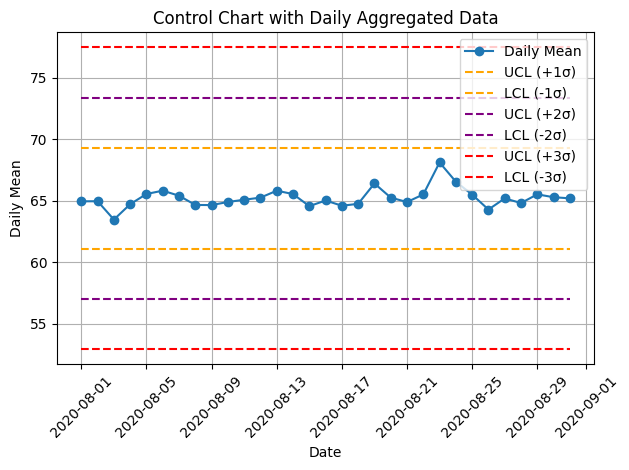

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data['timestamp'] = pd.to_datetime(data['timestamp'])

data['date'] = data['timestamp'].dt.date
data['month'] = data['timestamp'].dt.month
daily_data = data[data['month'] == 8].groupby(['month', 'date'])['Oil_temperature'].mean().reset_index()

monthly_data = data.groupby(['month'])['Oil_temperature'].agg(['mean', 'std']).reset_index()

monthly_data['ucl_1'] = monthly_data['mean'] + 1 * monthly_data['std']
monthly_data['lcl_1'] = monthly_data['mean'] - 1 * monthly_data['std']
monthly_data['ucl_2'] = monthly_data['mean'] + 2 * monthly_data['std']
monthly_data['lcl_2'] = monthly_data['mean'] - 2 * monthly_data['std']
monthly_data['ucl_3'] = monthly_data['mean'] + 3 * monthly_data['std']
monthly_data['lcl_3'] = monthly_data['mean'] - 3 * monthly_data['std']

merged_data = daily_data.merge(monthly_data, on='month', how='left')

merged_data.rename(columns={
    'mean': 'monthly_mean',
    'std': 'monthly_std_dev'
}, inplace=True)


# Plotting
plt.plot(merged_data['date'], merged_data['Oil_temperature'], marker='o', linestyle='-', label='Daily Mean')


plt.plot(merged_data['date'], merged_data['ucl_1'], color='orange', linestyle='--', label='UCL (+1σ)')
plt.plot(merged_data['date'], merged_data['lcl_1'], color='orange', linestyle='--', label='LCL (-1σ)')
plt.plot(merged_data['date'], merged_data['ucl_2'], color='purple', linestyle='--', label='UCL (+2σ)')
plt.plot(merged_data['date'], merged_data['lcl_2'], color='purple', linestyle='--', label='LCL (-2σ)')
plt.plot(merged_data['date'], merged_data['ucl_3'], color='red', linestyle='--', label='UCL (+3σ)')
plt.plot(merged_data['date'], merged_data['lcl_3'], color='red', linestyle='--', label='LCL (-3σ)')

plt.title('Control Chart with Daily Aggregated Data')
plt.xlabel('Date')
plt.ylabel('Daily Mean')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure 'timestamp' column is in datetime format
data = data.sort_values(by='timestamp')
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Aggregate data at the day level by calculating the daily mean
data['date'] = data['timestamp'].dt.date  # Extract date
daily_data = data.groupby(['date'])['Oil_temperature'].mean().reset_index()

# Calculate cumulative mean and standard deviation for daily aggregated data
cumulative_mean = daily_data['Oil_temperature'].expanding().mean().reset_index(level=0, drop=True)
cumulative_std_dev = daily_data['Oil_temperature'].expanding().std().reset_index(level=0, drop=True)

# Add cumulative mean and std dev to daily_data DataFrame
daily_data['cumulative_mean'] = cumulative_mean
daily_data['cumulative_std_dev'] = cumulative_std_dev

# Add control limits (1, 2, and 3 standard deviations from the mean)
daily_data['ucl_1'] = daily_data['cumulative_mean'] + 1 * daily_data['cumulative_std_dev']
daily_data['lcl_1'] = daily_data['cumulative_mean'] - 1 * daily_data['cumulative_std_dev']
daily_data['ucl_2'] = daily_data['cumulative_mean'] + 2 * daily_data['cumulative_std_dev']
daily_data['lcl_2'] = daily_data['cumulative_mean'] - 2 * daily_data['cumulative_std_dev']
daily_data['ucl_3'] = daily_data['cumulative_mean'] + 3 * daily_data['cumulative_std_dev']
daily_data['lcl_3'] = daily_data['cumulative_mean'] - 3 * daily_data['cumulative_std_dev']

daily_data.to_csv('/content/drive/MyDrive/GeorgiaTech/Proposal/Oil_temperature_data_20250408.csv', index=False)

# Plotting
# plt.plot(daily_data['date'], daily_data['DV_pressure'], marker='o', linestyle='-', label='Daily Mean')

# # Plot control limits
# plt.plot(daily_data['date'], daily_data['ucl_1'], color='orange', linestyle='--', label='UCL (+1σ)')
# plt.plot(daily_data['date'], daily_data['lcl_1'], color='orange', linestyle='--', label='LCL (-1σ)')
# plt.plot(daily_data['date'], daily_data['ucl_2'], color='purple', linestyle='--', label='UCL (+2σ)')
# plt.plot(daily_data['date'], daily_data['lcl_2'], color='purple', linestyle='--', label='LCL (-2σ)')
# plt.plot(daily_data['date'], daily_data['ucl_3'], color='red', linestyle='--', label='UCL (+3σ)')
# plt.plot(daily_data['date'], daily_data['lcl_3'], color='red', linestyle='--', label='LCL (-3σ)')

# # Customize plot
# plt.title('Control Chart with Daily Aggregated Data')
# plt.xlabel('Date')
# plt.ylabel('Daily Mean')
# plt.legend(loc='upper right')  # Move the legend to the upper-right corner
# plt.grid(True)
# plt.xticks(rotation=45)  # Rotate date labels for better readability
# plt.tight_layout()       # Adjust layout to prevent label overlap

# # Display the plot
# plt.show()



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure 'timestamp' column is in datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Aggregate data at the day level by calculating the daily mean
data['date'] = data['timestamp'].dt.date  # Extract date
data['month'] = data['timestamp'].dt.month  # Extract month
daily_data = data.groupby(['month', 'date'])['DV_pressure'].mean().reset_index()

# Calculate mean and standard deviation for monthly aggregated data
monthly_data = data.groupby(['month'])['DV_pressure'].agg(['mean', 'std']).reset_index()

# Add control limits (1, 2, and 3 standard deviations from the mean)
monthly_data['ucl_1'] = monthly_data['mean'] + 1 * monthly_data['std']
monthly_data['lcl_1'] = monthly_data['mean'] - 1 * monthly_data['std']
monthly_data['ucl_2'] = monthly_data['mean'] + 2 * monthly_data['std']
monthly_data['lcl_2'] = monthly_data['mean'] - 2 * monthly_data['std']
monthly_data['ucl_3'] = monthly_data['mean'] + 3 * monthly_data['std']
monthly_data['lcl_3'] = monthly_data['mean'] - 3 * monthly_data['std']

# Merge daily data with monthly data on the 'month' column
merged_data = daily_data.merge(monthly_data, on='month', how='left')

# Rename columns for clarity
merged_data.rename(columns={
    'mean': 'monthly_mean',
    'std': 'monthly_std_dev'
}, inplace=True)

# Display the first few rows
print(merged_data.head())

# Export the merged DataFrame to a CSV file
#daily_data.to_csv('/content/drive/MyDrive/GeorgiaTech/Proposal/DV_pressure_data.csv', index=False)




# Control limits
ucl_1 = mean + 1 * std_dev
lcl_1 = mean - 1 * std_dev
ucl_2 = mean + 2 * std_dev
lcl_2 = mean - 2 * std_dev
ucl_3 = mean + 3 * std_dev
lcl_3 = mean - 3 * std_dev

# Plotting
plt.plot(daily_data['date'], daily_data['DV_pressure'], marker='o', linestyle='-', label='Daily Mean')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl_1, color='orange', linestyle='--', label='UCL (+1σ)')
plt.axhline(lcl_1, color='orange', linestyle='--', label='LCL (-1σ)')
plt.axhline(ucl_2, color='purple', linestyle='--', label='UCL (+2σ)')
plt.axhline(lcl_2, color='purple', linestyle='--', label='LCL (-2σ)')
plt.axhline(ucl_3, color='red', linestyle='--', label='UCL (+3σ)')
plt.axhline(lcl_3, color='red', linestyle='--', label='LCL (-3σ)')
plt.title('Control Chart with Daily Aggregated Data')
plt.xlabel('Date')
plt.ylabel('Daily Mean')
plt.legend(loc='upper right')  # Move the legend to the upper-right corner
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()       # Adjust layout to prevent label overlap
plt.show()



NameError: name 'data' is not defined

In [ ]:
file_path = '/content/drive/MyDrive/GeorgiaTech/Proposal/MetroPT3(AirCompressor).csv'
data = import_data(file_path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully!


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.01,9.36,9.34,-0.02,9.36,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
1,10,2020-02-01 00:00:10,-0.01,9.35,9.33,-0.02,9.35,53.68,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
2,20,2020-02-01 00:00:19,-0.01,9.34,9.32,-0.02,9.34,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
3,30,2020-02-01 00:00:29,-0.01,9.33,9.31,-0.02,9.33,53.42,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
4,40,2020-02-01 00:00:39,-0.01,9.32,9.30,-0.02,9.32,53.48,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [ ]:
data['date'] = pd.to_datetime(data['timestamp']).dt.date

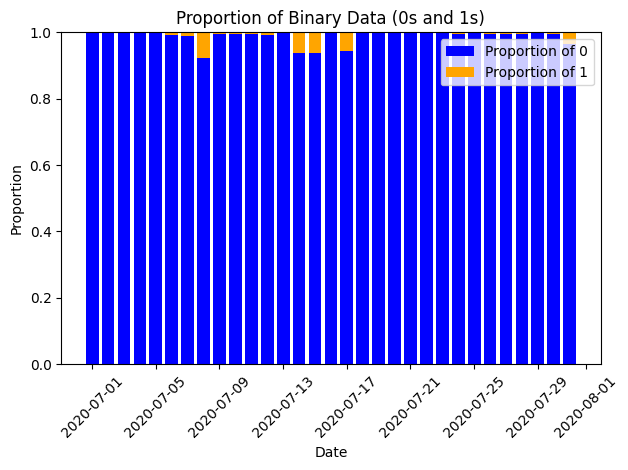

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'data' is a pandas DataFrame with 'timestamp' and 'LPS' (binary: 0 or 1) columns
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is in datetime format

# Filter data for July
july_data = data[data['timestamp'].dt.month == 7]

# Aggregate data at the day level to calculate proportions of 0's and 1's
july_data['date'] = july_data['timestamp'].dt.date  # Extract date
daily_counts = july_data.groupby(['date', 'LPS']).size().unstack(fill_value=0).reset_index()

# Rename columns for clarity
daily_counts.columns = ['date', 'count_0', 'count_1']

# Calculate proportions
daily_counts['proportion_0'] = daily_counts['count_0'] / (daily_counts['count_0'] + daily_counts['count_1'])
daily_counts['proportion_1'] = daily_counts['count_1'] / (daily_counts['count_0'] + daily_counts['count_1'])

# Plotting a stacked column chart for proportions
dates = daily_counts['date']
proportion_0 = daily_counts['proportion_0']
proportion_1 = daily_counts['proportion_1']

# Create the stacked column chart
plt.bar(dates, proportion_0, label='Proportion of 0', color='blue')
plt.bar(dates, proportion_1, bottom=proportion_0, label='Proportion of 1', color='orange')

# Add labels and title
plt.title('Proportion of Binary Data (0s and 1s)')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.legend(loc='upper right')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()       # Adjust layout to prevent label overlap
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data
data = pd.DataFrame({
    'timestamp': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'DV_pressure': [100, 110, 115, 120, 130, 125, 140, 135, 145, 150]
})

# Ensure 'timestamp' column is in datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Sort by timestamp to ensure cumulative calculations are correct
data = data.sort_values(by='timestamp')

# Calculate cumulative mean using pandas expanding
data['cumulative_mean'] = data['DV_pressure'].expanding().mean()

# Calculate cumulative standard deviation using pandas expanding
data['cumulative_std_dev'] = data['DV_pressure'].expanding().std()

# Display the data with the cumulative mean and cumulative standard deviation
print(data)

# Plotting both cumulative mean and cumulative standard deviation over time
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['cumulative_mean'], label='Cumulative Mean', color='blue')
plt.plot(data['timestamp'], data['cumulative_std_dev'], label='Cumulative Standard Deviation', color='orange')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Cumulative Mean and Standard Deviation by Date')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Tight layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
data.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses', 'date'],
      dtype='object')

Failure Dataset

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler, FunctionTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.compose import ColumnTransformer
# import matplotlib.pyplot as plt

# # Assuming your data is in a DataFrame called 'data' and 'label' is your target variable
# X = data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]
# y = data['label']

# # Identify binary and continuous columns
# binary_cols = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
# continuous_cols = [col for col in X.columns if col not in binary_cols]

# # Create transformers
# continuous_transformer = StandardScaler()
# binary_transformer = FunctionTransformer(lambda x: x)

# # Create column transformer
# preprocessor = ColumnTransformer(
#     transformers=[('continuous', continuous_transformer, continuous_cols),
#                   ('binary', binary_transformer, binary_cols)])

# # Apply undersampling to balance classes (using RandomUnderSampler for speed)
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# # Transform the resampled data
# X_transformed = preprocessor.fit_transform(X_resampled)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_resampled, test_size=0.2, random_state=42)

# # Train Logistic Regression model with L1 regularization (similar to Lasso)
# log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
# log_reg.fit(X_train, y_train)

# # Get predictions on the test set
# y_pred = log_reg.predict(X_test)

# # Evaluate accuracy and other metrics on the test set
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Set Accuracy: {accuracy:.2f}")
# print(classification_report(y_test, y_pred))
# print("AUC-ROC:", roc_auc_score(y_test, y_pred))
# print("F1 score:", f1_score(y_test, y_pred))

# # Display feature importance (coefficients of the logistic regression)
# log_reg_coefficients = pd.Series(log_reg.coef_[0], index=list(continuous_cols) + list(binary_cols))
# print("\nLogistic Regression Coefficients:")
# print(log_reg_coefficients)

# # Visualize feature importance
# plt.figure(figsize=(10, 6))
# log_reg_coefficients.abs().sort_values(ascending=False).plot(kind='bar')
# plt.title('Feature Importance (Logistic Regression - L1 Regularization)')
# plt.ylabel('Absolute Coefficient Value')
# plt.xlabel('Features')
# plt.show()

# # Cross-validation score to assess model stability
# cv_score = cross_val_score(log_reg, X_transformed, y_resampled, cv=5, scoring='accuracy')
# print(f"Cross-Validation Accuracy: {cv_score.mean():.2f} ± {cv_score.std():.2f}")


In [ ]:
# DV_pressure, Oil_temperature, LPS, Oil_level, Caudal_impulses

In [ ]:
import pandas as pd

data['date'] = pd.to_datetime(data['date'])

model_data = data[['timestamp', 'date', 'TP2', 'TP3', 'H1', 'DV_pressure',
                  'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
                  'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
                  'Caudal_impulses']]

print(model_data.shape)

model_data.head()

(1516948, 17)


,timestamp,date,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,2020-02-01,-0.01,9.36,9.34,-0.02,9.36,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
1,2020-02-01 00:00:10,2020-02-01,-0.01,9.35,9.33,-0.02,9.35,53.68,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
2,2020-02-01 00:00:19,2020-02-01,-0.01,9.34,9.32,-0.02,9.34,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
3,2020-02-01 00:00:29,2020-02-01,-0.01,9.33,9.31,-0.02,9.33,53.42,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
4,2020-02-01 00:00:39,2020-02-01,-0.01,9.32,9.30,-0.02,9.32,53.48,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00


In [ ]:
failure_periods = [
    ("2020-04-18 00:00", "2020-04-18 23:59"),
    ("2020-05-29 23:30", "2020-05-30 06:30"),
    ("2020-06-05 10:00", "2020-06-07 14:30"),
    ("2020-07-15 14:30", "2020-07-15 19:00")
]

failure_periods = [
    (pd.to_datetime(start), pd.to_datetime(end)) for start, end in failure_periods
]

print(failure_periods)


[(Timestamp('2020-04-18 00:00:00'), Timestamp('2020-04-18 23:59:00')), (Timestamp('2020-05-29 23:30:00'), Timestamp('2020-05-30 06:30:00')), (Timestamp('2020-06-05 10:00:00'), Timestamp('2020-06-07 14:30:00')), (Timestamp('2020-07-15 14:30:00'), Timestamp('2020-07-15 19:00:00'))]


In [ ]:
import pandas as pd

# Initialize the 'Target' column as NaN initially
model_data['Target'] = float('nan')

# Set the rolling window (7 days)
n = 1

# Loop over the failure periods and assign the 'Target' flag
for start, end in failure_periods:
    # Ensure both start and n_interval are datetime64[ns] (same type as model_data["date"])
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)

    # Define the n-day interval before the failure start
    n_interval = start - pd.Timedelta(hours=n)

    # Find rows where the date is within the n-day period before the failure
    time_frame = (model_data["timestamp"] >= n_interval) & (model_data["timestamp"] < start)

    # Assign '1' to the 'Target' column for the selected timeframe
    model_data.loc[time_frame, "Target"] = 1

# Fill any missing 'Target' values with 0 (indicating no failure within the period)
model_data['Target'].fillna(0, inplace=True)

# Ensure 'Target' is of integer type (optional, but good practice)
model_data['Target'] = model_data['Target'].astype(int)

# Display the updated model_data
model_data.tail(5)



,timestamp,date,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Target,cluster
1516943,2020-09-01 03:59:10,2020-09-01,-0.01,8.92,8.91,-0.02,8.92,59.67,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0,1
1516944,2020-09-01 03:59:20,2020-09-01,-0.01,8.90,8.89,-0.02,8.90,59.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0,1
1516945,2020-09-01 03:59:30,2020-09-01,-0.01,8.89,8.88,-0.02,8.89,59.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0,1
1516946,2020-09-01 03:59:40,2020-09-01,-0.01,8.88,8.86,-0.02,8.88,59.55,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0,1
1516947,2020-09-01 03:59:50,2020-09-01,-0.01,8.86,8.85,-0.02,8.86,59.48,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0,1


In [ ]:
model_data['Target'].sum()

np.int64(1387)

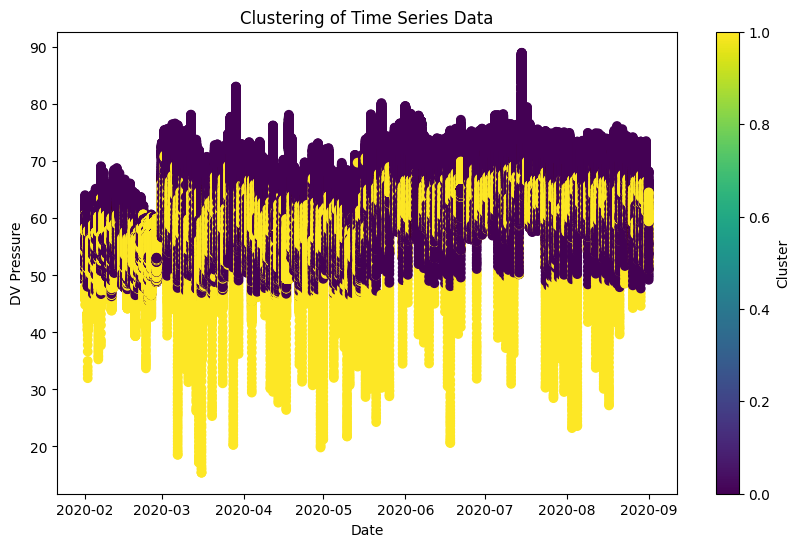

Cluster Analysis (Cluster Summary):
        Oil_temperature                    Motor_current                   \
                    min median   max  mean           min median  max mean   
cluster                                                                     
0                 45.53  67.60 89.05 67.15          0.02   3.83 9.29 4.49   
1                 15.40  59.20 72.85 59.11          0.02   0.04 6.47 0.14   

        Target  
           sum  
cluster         
0          719  
1          668  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Preprocess the data
# Selecting relevant columns and scaling the continuous features
features = ['Oil_temperature', 'Motor_current']
X = model_data[features]

# Scale the continuous features (ignoring binary features for scaling)
scaler = StandardScaler()
X_scaled = X[['Oil_temperature', 'Motor_current']]  # Scaling only the continuous variables
X_scaled = scaler.fit_transform(X_scaled)

# Combine back with the binary features (no scaling needed for these)
# X_scaled = np.hstack([X_scaled, X[['COMP', 'DV_eletric',
#                   'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
#                   'Caudal_impulses']]])

# Step 2: Apply K-Means clustering (choosing an arbitrary number of clusters, e.g., 3)
kmeans = KMeans(n_clusters=2, random_state=42)
model_data['cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Analyze the clusters
# Plotting the results to visualize the clusters over time (date)
plt.figure(figsize=(10, 6))
plt.scatter(model_data['date'], model_data['Oil_temperature'], c=model_data['cluster'], cmap='viridis', label='Cluster')
plt.title('Clustering of Time Series Data')
plt.xlabel('Date')
plt.ylabel('DV Pressure')
plt.colorbar(label='Cluster')
plt.show()


# Step 5: Check if any clusters correspond to failure periods
cluster_analysis = model_data.groupby('cluster').agg({
    #  'TP2': ['min', 'median', 'max'],
    #  'TP3': ['min', 'median', 'max'],
    #  'H1': ['min', 'median', 'max'],
    # 'Reservoirs': ['min', 'median', 'max'],
    # 'DV_pressure': ['min', 'median', 'max'],
    'Oil_temperature': ['min', 'median', 'max', 'mean'],
    'Motor_current': ['min', 'median', 'max', 'mean'],
    'Target': 'sum'  # Count how many failures are in each cluster
})

print("Cluster Analysis (Cluster Summary):")
print(cluster_analysis)

# Step 6: Check if failure is more likely to occur in specific clusters
# For example, check if failures are more concentrated in specific clusters
# failure_concentration = cluster_analysis[cluster_analysis['Target']['sum'] > 0]
# print("Clusters Associated with Failures:")
# print(failure_concentration)



In [ ]:
model_data.describe()

,date,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Target,cluster
count,1516948,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00
mean,2020-05-16 10:48:34.709271296,1.37,8.98,7.57,0.06,8.99,62.64,2.05,0.84,0.16,0.92,0.83,0.00,0.99,0.90,0.94,0.02,1.70
min,2020-02-01 00:00:00,-0.03,0.73,-0.04,-0.03,0.71,15.40,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2020-03-23 00:00:00,-0.01,8.49,8.25,-0.02,8.49,57.78,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00
50%,2020-05-17 00:00:00,-0.01,8.96,8.78,-0.02,8.96,62.70,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00
75%,2020-07-10 00:00:00,-0.01,9.49,9.37,-0.02,9.49,67.25,3.81,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,3.00
max,2020-09-01 00:00:00,10.68,10.30,10.29,9.84,10.30,89.05,9.29,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00
std,NaN,3.25,0.64,3.33,0.38,0.64,6.52,2.30,0.37,0.37,0.27,0.37,0.06,0.09,0.29,0.24,0.13,0.94
